<a href="https://colab.research.google.com/github/carlxen/CCADMACL_EXERCISES_COM232/blob/main/DURAN_Exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [13]:
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from google.colab import files
from IPython.display import Image

In [5]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [6]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [7]:
# put your answer here
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [8]:
# put your answer here
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [9]:
# put your answer here
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [11]:
# put your answer here
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [18]:
# put your answer here
df_newdf = df[['AnnualIncome', 'SpendingScore']]
df_newdf.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Display the first 10 rows. `(5 pts)`

In [19]:
# put your answer here
df_newdf.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

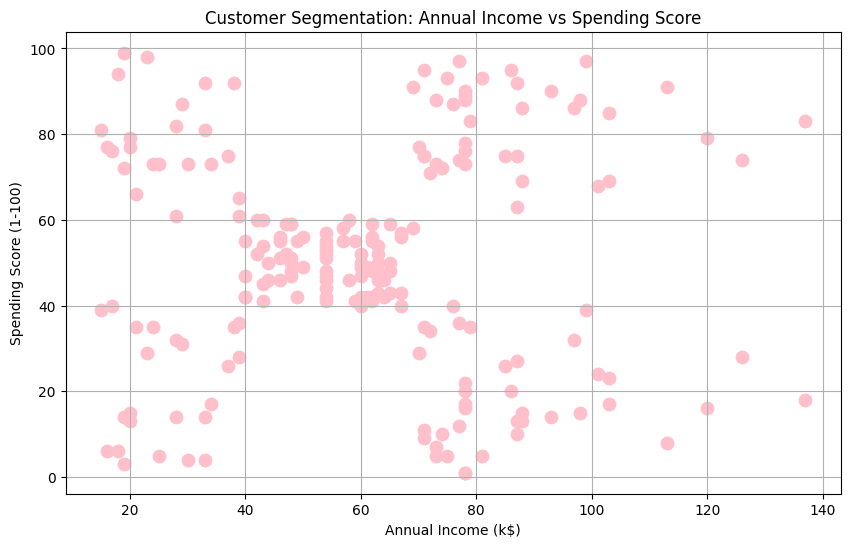

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_X[:, 0], df_X[:, 1], s = 80, c = 'pink')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation: Annual Income vs Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


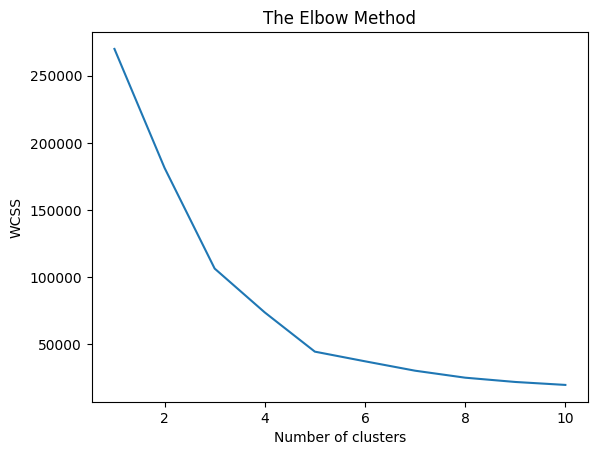

In [33]:
# put your answer here
wcss =[]
sse = {}
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
  kmeans.fit(df_X)
  wcss.append(kmeans.inertia_)
  sse[i] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [68]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(df_X)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

df_labeled['Cluster'] = pred_kmeans
print(df_labeled.head(10))

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 1 0 4 0 1 0 1 0 4 0 1 0 1 0 1 0 1 0 4 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
   AnnualIncome  SpendingScore  Cluster
0            15             39        2
1            15             81        3
2            16              6        2
3            16             77        3
4            17             40        2
5            17             76        3
6            18              6        2
7            18             94        3
8            19              3        2
9            19             72        3


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

K Means Output Cluster Frequency (from pred_kmeans) {np.int32(0): np.int64(39), np.int32(1): np.int64(35), np.int32(2): np.int64(23), np.int32(3): np.int64(22), np.int32(4): np.int64(81)}


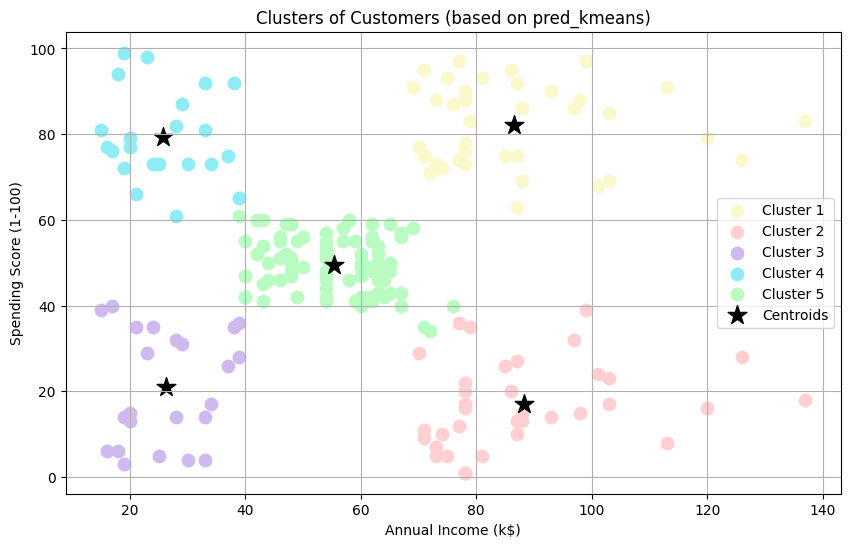

In [72]:
# put your answer here
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency (from pred_kmeans)',dict(zip(unique, counts)))

plt.figure(figsize=(10, 6))

plt.scatter(df_X[pred_kmeans == 0, 0], df_X[pred_kmeans == 0, 1], s = 80, c = '#FBF8CC', label = 'Cluster 1')
plt.scatter(df_X[pred_kmeans == 1, 0], df_X[pred_kmeans == 1, 1], s = 80, c = '#FFCFD2', label = 'Cluster 2')
plt.scatter(df_X[pred_kmeans == 2, 0], df_X[pred_kmeans == 2, 1], s = 80, c = '#CFBAF0', label = 'Cluster 3')
plt.scatter(df_X[pred_kmeans == 3, 0], df_X[pred_kmeans == 3, 1], s = 80, c = '#8EECF5', label = 'Cluster 4')
plt.scatter(df_X[pred_kmeans == 4, 0], df_X[pred_kmeans == 4, 1], s = 80, c = '#B9FBC0', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', marker='*')

plt.title('Clusters of Customers (based on pred_kmeans)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

Cluster 2 can be define as those who has high income but low on spending costs. While Cluster 4 shows the opposite with low income and high on spending costs. For promotions and discounts for products, Clusters 3 and 5 should be the target customers because they would be most likely to aim for prices that are lower than usual. While the coming of luxury goods can be notified to those has high income and high spending score (Cluster 1), low spenders but high income households (Cluster 2) can opt for the discounts of luxury good as they could afford it but will most likely be inclined to buy if the price is lowered than usual. Cluster 5 would most likely be inclined to spend more if the promotions either way are reached to them, they would fit to all the promotions ahead as a medium ground.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [74]:
# put your answer here
import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z= 'SpendingScore')
fig.show()

In [75]:
X = df [['Age', 'AnnualIncome', 'SpendingScore']]

In [79]:
cluster_Kmeans = KMeans(n_clusters=5)

model_kmeans = cluster_Kmeans.fit(X)

pred3d_kmeans = model_kmeans.labels_

print(pred3d_kmeans)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 1 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1
 2 1 2 2 2 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


Visualize using a 3D scatter plot. `(5 pts)`

In [80]:
# put your answer here
fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred3d_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Between clusters the age gaps, their income and spending, one cannot define that a person's age be the description on how their spending their income. Various ages can be both high spenders and low spenders whether they be low or high income. In light to these information, the most likely they would spend in a product should be focused on rather than what their ages are. Additionally, discounts and promotions are still highly recommendable as it is still for all people.